# Ngram model

# Shakespeare corpus

Run the cells below

In [1]:
#Download the shakespeare corpus

import nltk
nltk.download('shakespeare')

[nltk_data] Downloading package shakespeare to /root/nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!


True

In [2]:
# Read the shakespeare corpus from nltk

from nltk.corpus import shakespeare

corpus = ""

for fileid in shakespeare.fileids():
    play = shakespeare.xml(fileid)
    for p in play:
        corpus += "".join(p.tag)
        corpus += " \n\n\n\n "
        corpus += " ".join(list(p.itertext()))
        corpus += " \n\n\n\n "

corpus[1000:1500] # print a snippet of the corpus

"AND CLEOPATRA \n\n\n\n ACT \n\n\n\n ACT I \n\n SCENE I.  Alexandria. A room in CLEOPATRA's palace. \n Enter DEMETRIUS and PHILO \n\n \n PHILO \n Nay, but this dotage of our general's \n O'erflows the measure: those his goodly eyes, \n That o'er the files and musters of the war \n Have glow'd like plated Mars, now bend, now turn, \n The office and devotion of their view \n Upon a tawny front: his captain's heart, \n Which in the scuffles of great fights hath burst \n The buckles on his breast, reneges all temper, \n An"

# Question 1: Recap text preprocessing and cleaning

This is a recap of the previous tutorial. We will be reusing the code for preprocessing, tokenization and stemming.

Run the code and observe the output. Note how the sentences are split with the '.' character.

In [3]:
# from tutorial2 import stemming and stopwordremoval module
import re
import contractions
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import word_tokenize

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

def remove_punctuations(text):
    """Remove punctuations from a sample string except for periods"""
    return re.sub(r'[^\w\s.]','',text)

stop_words = stopwords.words('english')
def remove_stopwords(text):
    """Remove stopwords from a sample string"""
    return [word for word in text if word not in stop_words]


def clean_text(text):
    """Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers."""
    text = text.lower()
    # replace contractions
    text = replace_contractions(text)
    # remove URLs
    text = remove_URL(text)
    # tokenize text
    text = word_tokenize(text)
    # remove punctuations
    for i in range(len(text)):
        text[i] = remove_punctuations(text[i])
    # stem words
    snowball = SnowballStemmer(language='english')
    stemmed = [snowball.stem(word) for word in text]
    # remove stopwords
    filtered = remove_stopwords(stemmed)
    return " ".join(filtered)

corpus = clean_text(corpus)
corpus[1000:2000] # first 1000 characters of the cleaned corpus

'mper  becom bellow fan cool gipsi lust . flourish . enter antoni  cleopatra  ladi  train  eunuch fan look  come  take good note  shall see . tripl pillar world transform strumpet fool  behold see . cleopatra love inde  tell much . mark antoni beggari love reckon . cleopatra set bourn far belov . mark antoni must thou need find new heaven  new earth . enter attend attend news  good lord  rome . mark antoni grate  sum . cleopatra nay  hear  antoni  fulvia perchanc angri   know scarcebeard caesar sent power mandat    take kingdom  enfranchis  perform  els damn thee .  mark antoni  love  cleopatra perchanc  nay  like  must stay longer  dismiss come caesar  therefor hear  antoni . fulvia process  caesar would say   call messeng . egypt queen  thou blushest  antoni  blood thine caesar homag  els thi cheek pay shame shrilltongu fulvia scold . messeng  mark antoni let rome tiber melt  wide arch rang empir fall  space . kingdom clay  dungi earth alik feed beast man  nobl life thus  mutual pair

# Word frequency

# Question 1: Unigram frequencies

The code below computes the unigram frequencies of the words in the corpus.

Run the cell given below. ```count_unigrams(corpus)``` returns a dictionary with the words as keys and their frequencies as values.

We have marked the most important code where the frequencies are counted. 

Insert comments on each line about what it does.

[('thou', 1129), ('shall', 820), ('come', 817), ('love', 686), ('thi', 674), ('lord', 666), ('good', 631), ('thee', 626), ('caesar', 573), ('let', 569)]


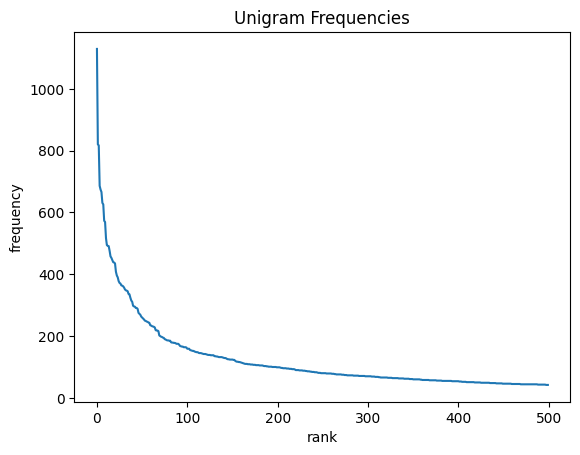

In [4]:
#Answer 1:


from collections import Counter
# Answer 1:
def count_unigrams(corpus):
    """Count the unigrams in a corpus and sort in descending order of counts"""
    
    ##################Comment this code##############################
    
    unigrams = {}
    words = corpus.replace('.', '')
    words = words.split()
    for word in words:
        if word not in unigrams:
            unigrams[word] = 1
        else:
            unigrams[word] += 1
    #################################################################

    
    unigrams = Counter(unigrams) # put your dictionary of counts in a Counter object
    unigrams = unigrams.most_common() #sort the unigrams in descending order of counts
    return unigrams # return unigram counts

counter_count_unigrams = count_unigrams(corpus)
# print the top 10 unigrams and their counts
print(counter_count_unigrams[:10])

#Visualize the distribution of unigram probabilities

from matplotlib import pyplot as plt

def plot_unigram_counts(counter_count_unigrams):
    counter_count_unigrams = counter_count_unigrams[:500] # plot the top 500 unigrams to view the distribution more clearly
    # get the counts from the counter object
    counts = [count for word, count in counter_count_unigrams]

    #compute the probabilities
    total = sum(counts)
    probs = [count/total for count in counts]

    plt.plot(counts)
    plt.xlabel('rank')
    plt.ylabel('frequency')
    plt.title('Unigram Frequencies')
    plt.show()

plot_unigram_counts(counter_count_unigrams)

#Note: You should see that the unigram frequencies follow Zipf's law
#Zipf's law states that the frequency of a word is inversely proportional to its rank in the frequency table
# i.e. the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.

# Question 2: Bigram joint and conditional probability (Calculation) 

Use the passage: 

```<s> James drives red cars </s> <s> John eats green eggs and drives purple cars </s> <s> Jonah eats red eggs and green ham </s> ```

Compute: 
1. unigram frequencies 
2. bigram joint probabilities (this table should contain columns - bigram, frequency, conditional probability) 
3. bigram conditional probabilities (this table should contain columns - bigram, bigram joint probability, unigram probability, bigram conditional probability)

<font color="red"> Write down your answers and submit in the assignment portal </font>


#Answer 2:

<img src="Bigram conditional.png" height=500rem>

# Question 3: Bigram joint probability (Code)

Joint probability of a bigram is the probability of the bigram occurring together in a sentence. For example, the joint probability of the bigram "the cat" is the probability of the sentence "the cat" occurring in the corpus. The joint probability of a bigram can be calculated as follows:

$$P(w_i, w_{i+1}) = \frac{C(w_i, w_{i+1})}{N}$$

$C(w_i, w_{i+1})$ : number of times "the" and "cat" occur together.

$N$: total number of unigrams


Now we will compute the joint probabilities of words in a sentence

1. Run the cell below. Comment what each line of code does in markdown given in Part 1.
2. Comment of what each line of code does in markdown given in Part 2.
3. Observe the scale of bigram frequencies. Comment on differences between unigram and bigram counts.

[('mark antoni', 286), ('domitius enobarbus', 138), ('octavius caesar', 134), ('let us', 128), ('king claudius', 120), ('exeunt scene', 110), ('thou art', 93), ('thou hast', 89), ('lord polonius', 86), ('queen gertrud', 81)]


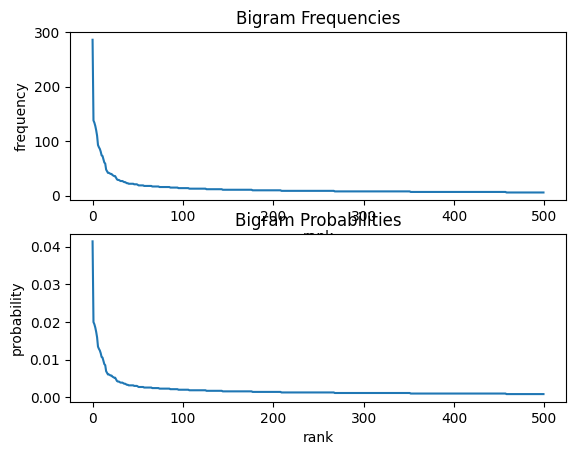

In [5]:
#Answer 2a/2b:


def count_bigrams(corpus):
    """Count the bigrams in a corpus and sort in descending order of counts"""

    ###################Part1##########################################
    # 3a: Compute the bigram frequencies of the words in the corpus
    ##################Comment lines here##############################
    bigrams = Counter()
    for sentence in corpus.split('.'):
        words = sentence.split()
        for i in range(len(words)-1):
            bigrams[words[i] + ' ' + words[i+1]] += 1

    bigrams = bigrams.most_common() # sort in descending order of counts

    return bigrams
    ##################################################################



counter_count_bigrams = count_bigrams(corpus)
# print the top 10 unigrams and their counts
print(counter_count_bigrams[:10])

#Visualize the distribution of bigram frequencies

from matplotlib import pyplot as plt

def plot_bigram_probs_and_freqs(counter_count_bigrams):
    counter_count_bigrams = counter_count_bigrams[:500] # plot the top 500 bigrams to view the distribution more clearly
    # get the counts from the counter object
    counts = [count for word, count in counter_count_bigrams]
    # get the probabilities from the counts

    ####################Part2#########################################
    #3b: Compute the bigram probabilities of the words in the corpus
    ##################Comment lines here##############################
    probs = [count/sum(counts) for count in counts]
    ##################################################################

    #clear the plot
    plt.clf()

    # plot the frequencies and probs in two separate subplots
    plt.subplot(2, 1, 1)
    plt.plot(counts)
    plt.xlabel('rank')
    plt.ylabel('frequency')
    plt.title('Bigram Frequencies')
    
    plt.subplot(2, 1, 2)
    plt.plot(probs)
    plt.xlabel('rank')
    plt.ylabel('probability')
    plt.title('Bigram Probabilities')
    plt.show()

plot_bigram_probs_and_freqs(counter_count_bigrams)
#Note: You should see that the bigram probabilities follow also Zipf's law
#Note the difference between the unigram and bigram probabilities
#Bigram probablities are

# Question 4: Trigram Joint probabilities

1. Run the cell below to compute the trigram joint probabilities and plot them. 
2. Compare the bigram and trigram joint frequencies. What do you notice?

[('exeunt scene ii', 32), ('exeunt scene iii', 22), ('exeunt act act', 22), ('enter mark antoni', 18), ('exeunt scene iv', 15), ('exeunt scene v', 14), ('fare thee well', 12), ('enter octavius caesar', 12), ('three thousand ducat', 12), ('let us go', 11)]


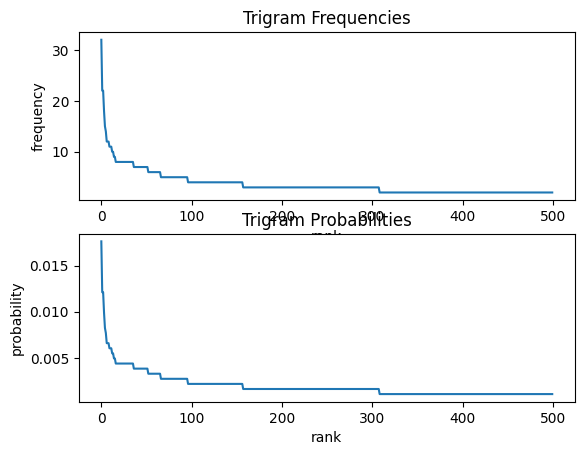

In [6]:
# Answer 4:


def count_trigrams(corpus):
    """Count the bigrams in a corpus and sort in descending order of counts"""
    trigrams = {}
    for sentence in corpus.split('.'):
        words = sentence.split()
        for i in range(len(words)-2):
            trigram = words[i] + ' ' + words[i+1] + ' ' + words[i+2]
            if trigram in trigrams:
                trigrams[trigram] += 1
            else:
                trigrams[trigram] = 1

    # put your dictionary of counts in a Counter object
    trigrams = Counter(trigrams)
    #sort the bigrams in descending order of counts
    trigrams = trigrams.most_common()
    return trigrams

counter_count_trigrams = count_trigrams(corpus)
# print the top 10 unigrams and their counts
print(counter_count_trigrams[:10])

#Visualize the distribution of unigram probabilities

from matplotlib import pyplot as plt

def plot_trigram_probs(counter_count_trigrams):
    counter_count_trigrams = counter_count_trigrams[:500] # plot the top 500 unigrams to view the distribution more clearly
    # get the counts from the counter object
    counts = [count for word, count in counter_count_trigrams]
    # get the probabilities from the counts
    probs = [count/sum(counts) for count in counts]

    #clear the plot
    plt.clf()
    # plot the frequencies and probs in two separate subplots
    plt.subplot(2, 1, 1)
    plt.plot(counts)
    plt.xlabel('rank')
    plt.ylabel('frequency')
    plt.title('Trigram Frequencies')
    
    plt.subplot(2, 1, 2)
    plt.plot(probs)
    plt.xlabel('rank')
    plt.ylabel('probability')
    plt.title('Trigram Probabilities')
    plt.show()



plot_trigram_probs(counter_count_trigrams)
#Note: You should see that the trigram frequencies follow Zipf's law

The graph is not as smooth as the unigram graph


This boils down to <font color="red"> **data sparsity** </font>:

Data sparsity is defined as the phenomenon that the number of possible n-grams is exponentially large,
but the number of n-grams that actually occur is much smaller.

The corpus has more trigrams than unigrams. In terms of frequencies, these ngrams are less frequent than the unigrams.
As the rank of the trigram increases, the frequency decreases more rapidly than unigram frequencies because of the data sparsity problem.

As your n-gram length increases, the amount of times you will see any given n-gram will decrease:
In the most extreme example, if you have a corpus where the maximum document length is n tokens and you are looking for an m-gram where m=n+1,
you will, of course, have no data points at all because it's simply not possible to have a sequence of that length in your data set.
The more sparse your data set, the worse you can model it.


For this reason, despite that a higher-order n-gram model, in theory, contains more information about a word's context,
it cannot easily generalize to other data sets (known as <font color="red"> **overfitting** </font>)

# Conditional probabilities

# Question 5: Bigram Conditional Probability

In question 2, we look at how to calculate bigram conditional probabilities by hand. 
In question 3, we calculate the bigram joint probablity. 

Now we compute the bigram conditional probabilities as:

1. We compute the bigram probabilities for the sentence 'Romeo hath killed the king'.  We use the bigram counts from the previous question.  
2. We also add a start symbol \<s\> and end symbol \</s\> to the sentence.
3. This time the bigram model is a table of probabilities.  The table should be a dictionary of dictionaries.  
4. The outer dictionary is indexed by the first word of the bigram, and the inner dictionary is indexed by the second word of the bigram.  
5. The value of the inner dictionary is the probability of the bigram.

<font color="red"> Read the two snippets of code in ######################################## and understand how the bigram conditional probabilities are computed. </font>

In [7]:
# Answer 5:

#compute probability of a sentence using bigram language model

#make the bigram model
def bigram_model(corpus):
    bigram = {}

    ############################################################
    ######################Read code here########################
    sentences = corpus.split('.')
    for sentence in sentences:
        sentence = "<s> " + sentence + " </s>"
        sentence = sentence.split()
        for i in range(len(sentence)-1):
            word = sentence[i]
            next_word = sentence[i+1]
            if word not in bigram:
                bigram[word] = Counter()
            bigram[word][next_word] += 1
    ############################################################
    return bigram

bigram_model(corpus)

#compute probability of a sentence using bigram language model
sentence = 'romeo hath kill king' #let us provide a stemmed sentence
sentence = sentence.lower()
#add <s> and </s> to the sentence
sentence = '<s> ' + sentence + ' </s>'

bigram = bigram_model(corpus)
print('The bigram model is a table that contains the counts of bigrams in the corpus')
print('It is a nested dictionary where the first word is the key of the outer dictionary')
print('The value of the outer dictionary is another dictionary')
print('The second word is the key of the inner dictionary')
print('The value of the inner dictionary is the count of the bigram\n\n')

print(bigram)

#compute probability of a sentence using bigram language model

def bigram_prob(sentence, bigram):
    ############################################################
    ######################Read code here########################
    sentence = sentence.split()
    prob = 1
    for w1, w2 in zip(sentence[:-1], sentence[1:]):
        print(w1, w2, bigram[w1][w2])
        prob *= bigram[w1][w2] / sum(bigram[w1].values())
    ############################################################
    return prob

print(bigram_prob(sentence, bigram))

The bigram model is a table that contains the counts of bigrams in the corpus
It is a nested dictionary where the first word is the key of the outer dictionary
The value of the outer dictionary is another dictionary
The second word is the key of the inner dictionary
The value of the inner dictionary is the count of the bigram


{'<s>': Counter({'enter': 356, 'hamlet': 250, 'exeunt': 215, 'exit': 203, 'othello': 153, 'iago': 148, 'cleopatra': 147, 'mark': 137, 'brutus': 134, 'romeo': 118, 'come': 112, 'desdemona': 107, 'first': 103, 'cassius': 102, 'portia': 93, 'macbeth': 89, 'octavius': 78, 'domitius': 74, 'lord': 72, 'king': 68, 'ladi': 67, 'juliet': 65, 'cassio': 63, 'emilia': 60, 'horatio': 58, 'good': 57, 'bassanio': 54, 'second': 52, 'shylock': 52, 'nurs': 51, 'thou': 49, 'mercutio': 48, 'let': 46, 'queen': 46, 'go': 45, 'antoni': 45, 'macduff': 45, 'gratiano': 44, 'friar': 44, 'caesar': 42, 'reenter': 41, 'laert': 41, 'demetrius': 40, 'pompey': 39, 'antonio': 39, 'charmian': 38,

# Question 5: Trigram Conditional Probablity

Now read and understand the code
1. We compute the trigram probabilities for the sentence 'Romeo hath killed the king'.  
2. We should use the bigram counts from the previous question.  
3. You should also add a start symbol \<s\> and end symbol \</s\> to the sentence.

<font color="red"> Read the two snippets of code in ######################################## and understand how the trigram conditional probabilities are computed. </font>

In [8]:
# Answer 4a:

#compute probability of a sentence using trigram language model

#make the trigram model
def trigram_model(corpus):
    trigram = {}

    ############################################################
    ######################Enter code here#######################
    sentences = corpus.split('.')
    for sentence in sentences:
        sentence = sentence.lower()
        sentence = '<s> ' + sentence + ' </s>'
        sentence = sentence.split()
        for w1, w2, w3 in zip(sentence[:-2], sentence[1:-1], sentence[2:]):
            if w1 not in trigram:
                trigram[w1] = {}
            if w2 not in trigram[w1]:
                trigram[w1][w2] = {}
            if w3 not in trigram[w1][w2]:
                trigram[w1][w2][w3] = 0
            trigram[w1][w2][w3] += 1

    ############################################################
    return trigram

trigram_model(corpus)

#compute probability of a sentence using bigram language model
sentence = 'romeo hath kill king' #let us provide a stemmed sentence
sentence = sentence.lower()
#add <s> and </s> to the sentence
sentence = '<s> ' + sentence + ' </s>'

trigram = trigram_model(corpus)

# print(trigram)

#compute probability of a sentence using trigram language model

def trigram_prob(sentence, trigram, bigram):
    ############################################################
    ######################Enter code here#######################
    sentence = sentence.split()
    prob = 1
    for w1, w2, w3 in zip(sentence[:-2], sentence[1:-1], sentence[2:]):
        if w1 in trigram and w2 in trigram[w1] and w3 in trigram[w1][w2]:
            product = trigram[w1][w2][w3] / bigram[w1][w2]
            prob *= product
            print(w1, w2, w3, product)
        else:
            prob = 0
            print(w1, w2, w3, 0)
            # break
    ############################################################
    return prob

print(trigram_prob(sentence, trigram, bigram))

<s> romeo hath 0
romeo hath kill 0
hath kill king 0.2
kill king </s> 0
0


These are the trigrams and their respective conditional probabilities:

* \<s\> romeo hath 0

* romeo hath kill 0

* hath kill king 0.2

* kill king \</s\> 0

Note that "romeo hath kill" has a conditional probability of 0, which means that the trigram "romeo hath kill" is not in the training corpus. This is because our corpus is quite small.

If we were to use a larger corpus, we would have more trigrams and the conditional probabilities would be more accurate.

# Question 6: Why are trigram probs zero?


Based on output given by question 5 of the trigram probablities, observe the trigram probabilities for the following trigrams:
1. \<s\> romeo hath kill
2. hath kill king

Why is the probability of the first trigram zero?

<font color='red'>Enter your answer in the cell below. </font>

In [ ]:
# Answer 6

###############################Enter your answer here#################################

# Question 7: Smoothing trigram model

Read the code written in the snippet below and answer the following questions about add one smoothing:
1. Why is probability of a trigram with a zero count non-zero after smoothing?
2. What is N in the case of trigrams?
3. What would it be in the case of bigram with add one smoothing?
4. What does prob*=product denote for trigrams?

<font color="red"> Enter your answers in the cell below the code cell marked as Answer 7 </font>

In [12]:
#compute probability of a sentence using trigram language model with add-one smoothing

def trigram_prob_smooth(sentence, trigram, bigram):
    ############################################################
    ######################Read code here#######################
    sentence = sentence.split()
    prob = 1
    for w1, w2, w3 in zip(sentence[:-2], sentence[1:-1], sentence[2:]):
        if w1 in trigram and w2 in trigram[w1] and w3 in trigram[w1][w2]:
            N = len(bigram[w1])
            product = (trigram[w1][w2][w3] + 1) / (bigram[w1][w2] + N)
            # product = trigram[w1][w2][w3] / bigram[w1][w2]
            prob *= product
            print(w1, w2, w3, product)
        else:
            #assign probability with add-one smoothing
            N = len(bigram[w1])
            product = 1 / (bigram[w1][w2] + N)
            print(w1, w2, w3, product)
            # break
    ############################################################
    return prob

print('hello')
print(trigram_prob_smooth(sentence, trigram_smooth, bigram))

hello
<s> romeo hath 0.0007485029940119761
romeo hath kill 0.005154639175257732
hath kill king 0.010169491525423728
kill king </s> 0.014492753623188406
0.010169491525423728


In [ ]:
# Answer 7:

###############################Enter your answer here#################################

References:

* https://medium.com/mti-technology/n-gram-language-models-70af02e742ad

In [ ]:
# ChatGPT:

#Answer about trigram. Copied the code from bigram model. The loop runs out of index because the last word in the sentence is not in the trigram model.
# Boils down to replacing i-1 with i-2 in the loop.